In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import matplotlib
from matplotlib import dates as mdates


In [6]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable
  Using cached lxml-4.7.1-cp38-cp38-macosx_10_14_x86_64.whl (4.5 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
matplotlib.style.use('ggplot')

In [8]:
xml = "export.xml"

In [9]:
df = pd.read_xml(xml)
df_backup = df.copy()

In [10]:
df
for col in df.columns:
    print(col)

value
HKCharacteristicTypeIdentifierDateOfBirth
HKCharacteristicTypeIdentifierBiologicalSex
HKCharacteristicTypeIdentifierBloodType
HKCharacteristicTypeIdentifierFitzpatrickSkinType
HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse
type
sourceName
sourceVersion
unit
creationDate
startDate
endDate
MetadataEntry
device
workoutActivityType
duration
durationUnit
totalDistance
totalDistanceUnit
totalEnergyBurned
totalEnergyBurnedUnit
WorkoutEvent
WorkoutRoute
dateComponents
activeEnergyBurned
activeEnergyBurnedGoal
activeEnergyBurnedUnit
appleMoveTime
appleMoveTimeGoal
appleExerciseTime
appleExerciseTimeGoal
appleStandHours
appleStandHoursGoal
HeartRateVariabilityMetadataList


In [11]:
step_cut = df.type == "HKQuantityTypeIdentifierStepCount"
unit_cut = df.unit == "count"

In [12]:
# df = df.dropna
df_steps = df[step_cut & unit_cut].copy()

In [13]:
df_steps = df_steps.drop(columns=[
"HKCharacteristicTypeIdentifierDateOfBirth",
"HKCharacteristicTypeIdentifierBiologicalSex",
"HKCharacteristicTypeIdentifierBloodType",
"HKCharacteristicTypeIdentifierFitzpatrickSkinType",
"HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse",
"totalDistance",
"totalDistanceUnit",
"totalEnergyBurned",
"totalEnergyBurnedUnit",
"WorkoutEvent",
"WorkoutRoute",
"dateComponents",
"activeEnergyBurned",
"activeEnergyBurnedGoal",
"activeEnergyBurnedUnit",
"appleMoveTime",
"appleMoveTimeGoal",
"appleExerciseTime",
"appleExerciseTimeGoal",
"appleStandHours",
"appleStandHoursGoal",
"HeartRateVariabilityMetadataList",
"MetadataEntry",
"durationUnit",
"duration"])

In [14]:
df_steps.startDate

3228     2021-11-12 16:06:20 -0500
3229     2021-11-12 16:23:43 -0500
3230     2021-11-12 16:47:16 -0500
3231     2016-11-28 17:25:34 -0500
3232     2016-11-28 17:35:33 -0500
                   ...            
56299    2021-12-25 20:16:45 -0500
56300    2021-12-25 20:27:32 -0500
56301    2021-12-25 21:14:29 -0500
56302    2021-12-25 21:24:29 -0500
56303    2021-12-25 21:42:09 -0500
Name: startDate, Length: 53076, dtype: object

In [15]:
df_steps.startDate = pd.to_datetime(df_steps.startDate, format='%Y-%m-%d %H:%M:%S %z')
df_steps.endDate = pd.to_datetime(df_steps.endDate, format='%Y-%m-%d %H:%M:%S %z')

In [16]:
df_steps.set_index("startDate", inplace=True)

In [17]:
df_steps["value"] = df_steps["value"].astype(int)

In [26]:
# vals = df_steps.groupby(pd.Grouper(freq='D')).sum()
vals = df_steps.resample('D').sum()


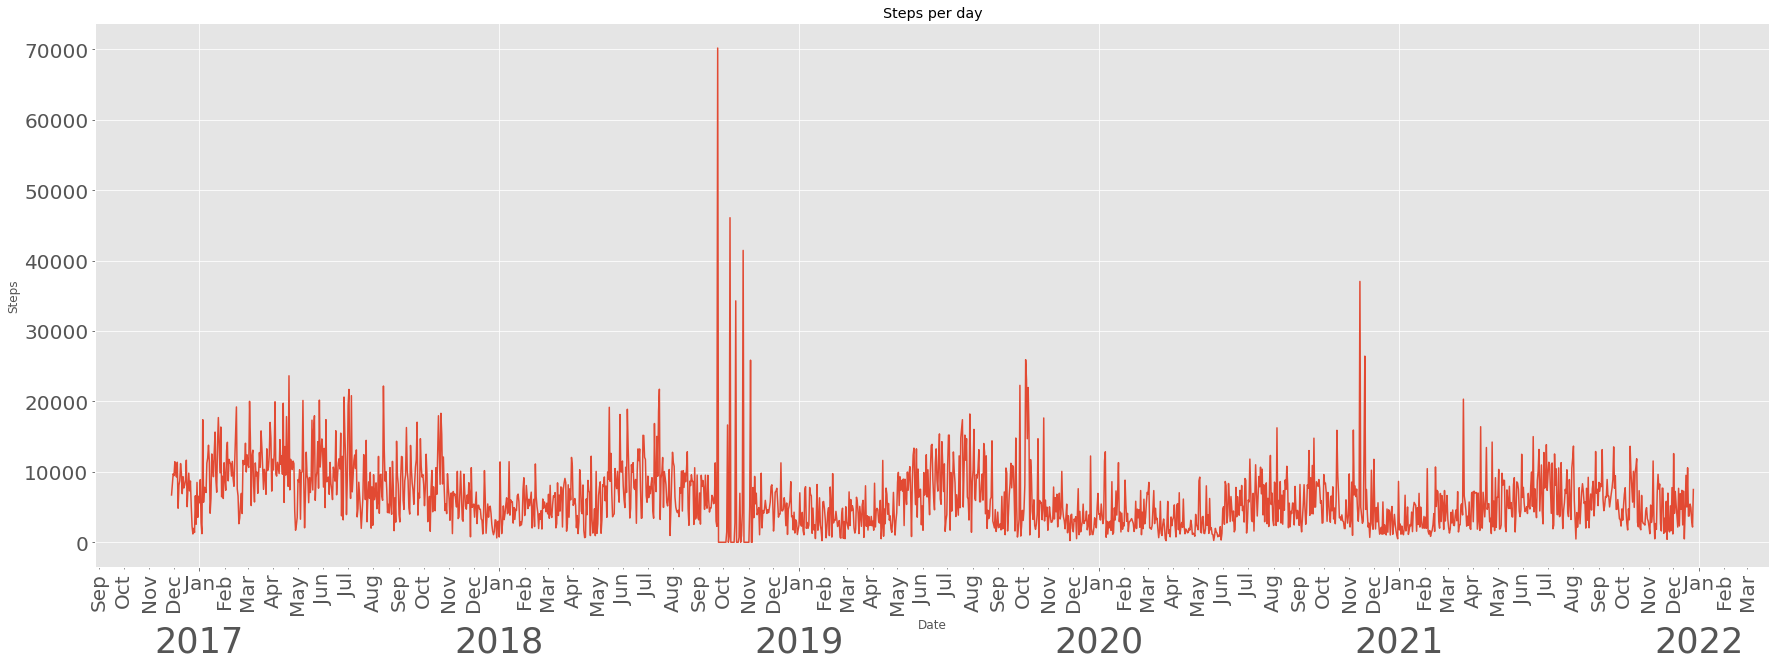

In [27]:
# plt.figure(figsize=(12,6))
# vals.plot()
fig, ax=plt.subplots(1, 1, figsize=(30, 10))
plt.plot(vals.index, vals.value)
plt.title("Steps per day")
plt.xlabel("Date")
plt.ylabel("Steps")

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
for text in ax.get_xminorticklabels():
     text.set_rotation(90)

ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=20, which='both')
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=35)


plt.show()
